In [8]:
#  Optimisation et Interprétation du Modèle  

# Ce notebook a pour but :  d’optimiser les hyperparamètres du meilleur modèle (Forêt Aléatoire),   d’évaluer sa **performance finale** sur le jeu de test,  et d’**analyser l’importance des variables** dans la prédiction.  


In [9]:
#  Optimisation et interprétation du modèle
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import shap

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")


In [10]:
# --- Charger les données
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv").squeeze("columns")
y_test = pd.read_csv("data/y_test.csv").squeeze("columns")



In [11]:
# --- Optimisation des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(" Meilleurs paramètres :", grid.best_params_)



 Meilleurs paramètres : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [12]:
# --- Évaluation finale
y_pred = best_model.predict(X_test)
print(f"R² : {r2_score(y_test, y_pred):.3f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.3f}")


R² : 0.871
MAE : 775822.216


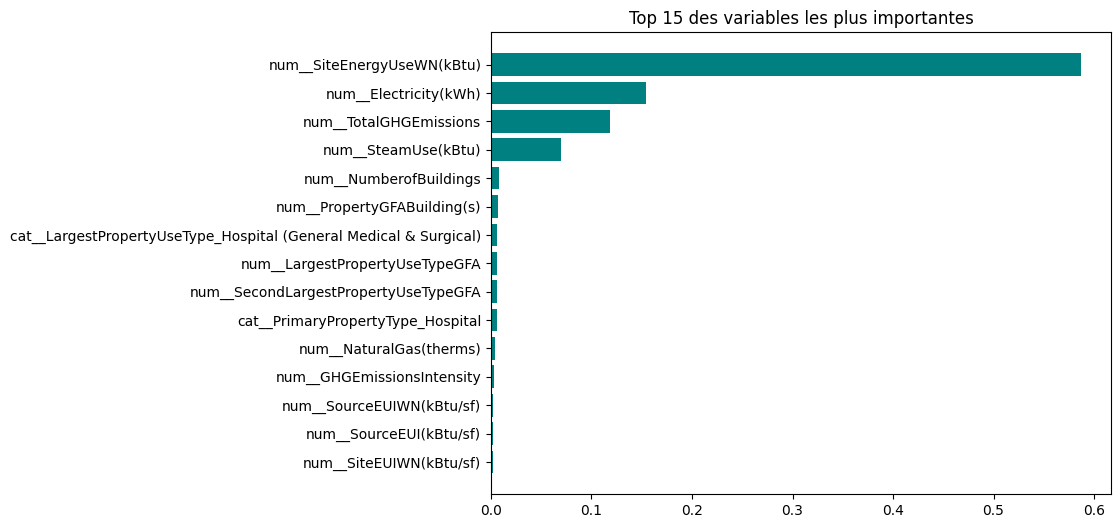

In [13]:
# --- Importance des variables
importances = best_model.feature_importances_
indices = np.argsort(importances)[-15:]
plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], color="teal")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.title("Top 15 des variables les plus importantes")
plt.show()



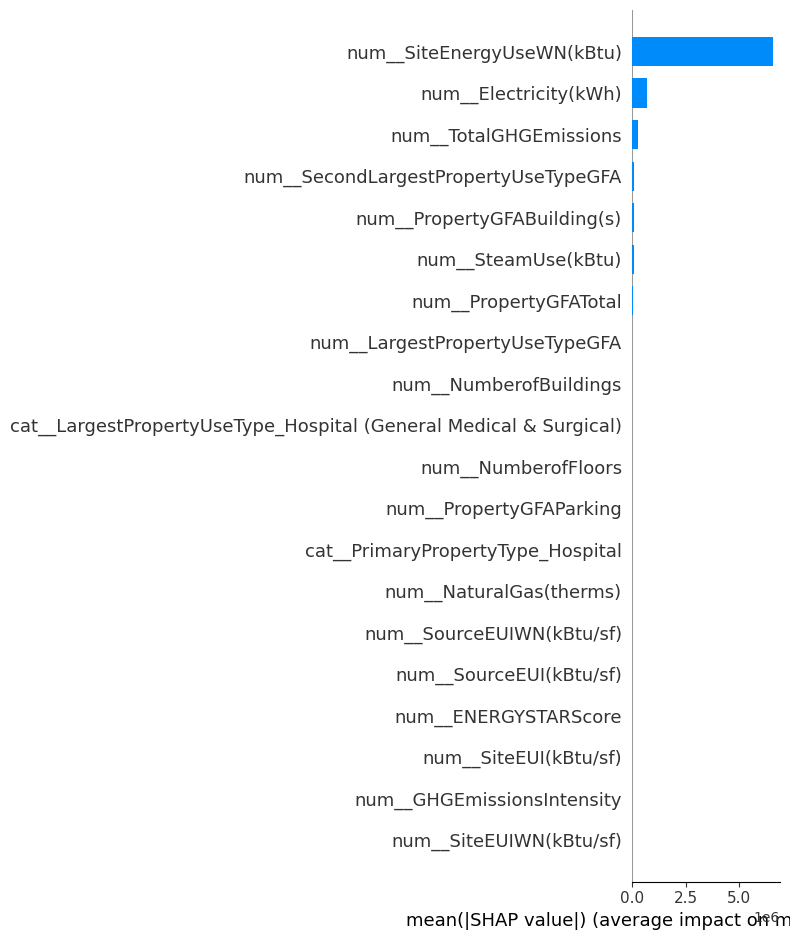

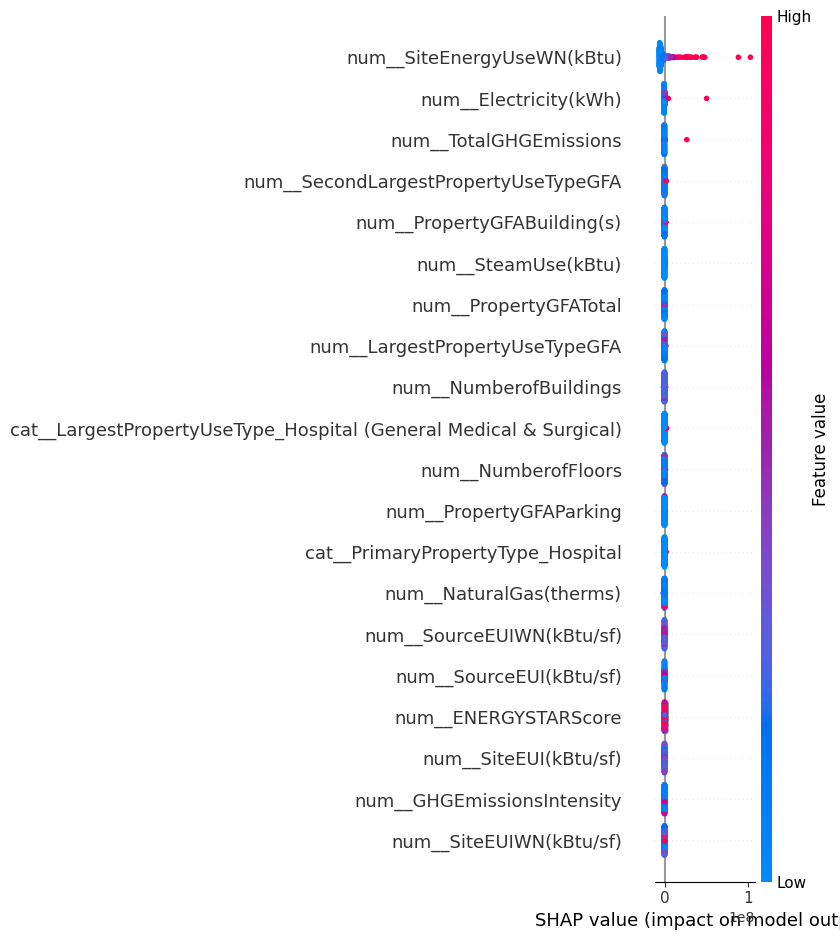

In [14]:
# --- Interprétation SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)
